In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lendingclub-issued-loans/new.html
/kaggle/input/lendingclub-issued-loans/us-state-codes.csv
/kaggle/input/lendingclub-issued-loans/lc_loan.csv
/kaggle/input/lendingclub-issued-loans/lc_2016_2017.csv


#### About the Dataset 
LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower-interest-rate loans through a fast online interface.

Lending Club enables borrowers to create unsecured personal loans between $1,000  and  $40,000. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee.


### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

### Reading Dataset

In [4]:
data = pd.read_csv("/kaggle/input/lendingclub-issued-loans/lc_loan.csv",low_memory=False)

In [5]:
print("Size of dataset -",data.shape)
display(data.head(3))

Size of dataset - (887379, 74)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### About Dataframe

#### 💾 Data Description

Information of this particular data set:

| LoanStatNew | Description |
|- - - - - - - -  - - - - - - - - - - - - - -|- - - - - - - - - - - |
| acc_now_delinq | The number of accounts on which the borrower is now delinquent. |
| acc_open_past_24mths | Number of trades opened in past 24 months. |
| addr_state | The state provided by the borrower in the loan application |
| all_util | Balance to credit limit on all trades |
| annual_inc | The self-reported annual income provided by the borrower during registration. |
| annual_inc_joint | The combined self-reported annual income provided by the co-borrowers during registration |
| application_type | Indicates whether the loan is an individual application or a joint application with two co-borrowers |
| avg_cur_bal | Average current balance of all accounts |
| bc_open_to_buy | Total open to buy on revolving bankcards. |
| bc_util | Ratio of total current balance to high credit/credit limit for all bankcard accounts. |
| chargeoff_within_12_mths | Number of charge-offs within 12 months |
| collection_recovery_fee | post charge off collection fee |
| collections_12_mths_ex_med | Number of collections in 12 months excluding medical collections |
| delinq_2yrs | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years |
| delinq_amnt | The past-due amount owed for the accounts on which the borrower is now delinquent. |
| desc | Loan description provided by the borrower |
| dti | "A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income." |
| dti_joint | "A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income" |
| earliest_cr_line | The month the borrower's earliest reported credit line was opened |
| emp_length | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.  |
| emp_title | The job title supplied by the Borrower when applying for the loan. |
| fico_range_high | The upper boundary range the borrower’s FICO at loan origination belongs to. |
| fico_range_low | The lower boundary range the borrower’s FICO at loan origination belongs to. |
| funded_amnt | The total amount committed to that loan at that point in time. |
| funded_amnt_inv | The total amount committed by investors for that loan at that point in time. |
| grade | LC assigned loan grade |
| home_ownership | "The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER." |
| id | A unique LC assigned ID for the loan listing. |
| il_util | Ratio of total current balance to high credit/credit limit on all install acct |
| initial_list_status | "The initial listing status of the loan. Possible values are – W, F" |
| inq_fi | Number of personal finance inquiries |
| inq_last_12m | Number of credit inquiries in past 12 months |
| inq_last_6mths | The number of inquiries in past 6 months (excluding auto and mortgage inquiries) |
| installment | The monthly payment owed by the borrower if the loan originates. |
| int_rate | Interest Rate on the loan |
| issue_d | The month which the loan was funded |
| last_credit_pull_d | The most recent month LC pulled credit for this loan |
| last_fico_range_high | The upper boundary range the borrower’s last FICO pulled belongs to. |
| last_fico_range_low | The lower boundary range the borrower’s last FICO pulled belongs to. |
| last_pymnt_amnt | Last total payment amount received |
| last_pymnt_d | Last month payment was received |
| loan_amnt | "The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value." |
| loan_status | Current status of the loan |
| max_bal_bc | Maximum current balance owed on all revolving accounts |
| member_id | A unique LC assigned Id for the borrower member. |
| mo_sin_old_il_acct | Months since oldest bank installment account opened |
| mo_sin_old_rev_tl_op | Months since oldest revolving account opened |
| mo_sin_rcnt_rev_tl_op | Months since most recent revolving account opened |
| mo_sin_rcnt_tl | Months since most recent account opened |
| mort_acc |Number of mortgage accounts. |
| mths_since_last_delinq | The number of months since the borrower's last delinquency. |
| mths_since_last_major_derog | Months since most recent 90-day or worse rating |
| mths_since_last_record | The number of months since the last public record. |
| mths_since_rcnt_il | Months since most recent installment accounts opened |
| mths_since_recent_bc | Months since most recent bankcard account opened. |
| mths_since_recent_bc_dlq | Months since most recent bankcard delinquency |
| mths_since_recent_inq | Months since most recent inquiry. |
| mths_since_recent_revol_delinq | Months since most recent revolving delinquency. |
| next_pymnt_d | Next scheduled payment date |
| num_accts_ever_120_pd | Number of accounts ever 120 or more days past due |
| num_actv_bc_tl | Number of currently active bankcard accounts |
| num_actv_rev_tl | Number of currently active revolving trades |
| num_bc_sats | Number of satisfactory bankcard accounts |
| num_bc_tl | Number of bankcard accounts |
| num_il_tl | Number of installment accounts |
| num_op_rev_tl | Number of open revolving accounts |
| num_rev_accts | Number of revolving accounts |
| num_rev_tl_bal_gt_0 | Number of revolving trades with balance >0 |
| num_sats | Number of satisfactory accounts |
| num_tl_120dpd_2m | Number of accounts currently 120 days past due (updated in past 2 months) |
| num_tl_30dpd | Number of accounts currently 30 days past due (updated in past 2 months) |
| num_tl_90g_dpd_24m | Number of accounts 90 or more days past due in last 24 months |
| num_tl_op_past_12m | Number of accounts opened in past 12 months  |
| open_acc | The number of open credit lines in the borrower's credit file. |
| open_acc_6m | Number of open trades in last 6 months |
| open_il_12m | Number of installment accounts opened in past 12 months |
| open_il_24m | Number of installment accounts opened in past 24 months |
| open_il_6m | Number of currently active installment trades |
| open_rv_12m | Number of revolving trades opened in past 12 months |
| open_rv_24m | Number of revolving trades opened in past 24 months |
| out_prncp | Remaining outstanding principal for total amount funded |
| out_prncp_inv | Remaining outstanding principal for portion of total amount funded by investors |
| pct_tl_nvr_dlq | Percent of trades never delinquent | 
| percent_bc_gt_75 | Percentage of all bankcard accounts > 75% of limit. |
| policy_code | "publicly available policy_code=1 new products not publicly available policy_code=2" |
| pub_rec | Number of derogatory public records | 
| pub_rec_bankruptcies | Number of public record bankruptcies | 
| purpose | A category provided by the borrower for the loan request.  |
| pymnt_plan | Indicates if a payment plan has been put in place for the loan |
|recoveries | post charge off gross recovery |
|revol_bal | Total credit revolving balance |
| revol_util | "Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit." |
| sub_grade | LC assigned loan subgrade |
| tax_liens | Number of tax liens |
| term | The number of payments on the loan. Values are in months and can be either 36 or 60. |
| title | The loan title provided by the borrower| 
| tot_coll_amt | Total collection amounts ever owed |
| tot_cur_bal | Total current balance of all accounts |
| tot_hi_cred_lim | Total high credit/credit limit |
| total_acc | The total number of credit lines currently in the borrower's credit file |
|total_bal_ex_mort | Total credit balance excluding mortgage |
| total_bal_il | Total current balance of all installment accounts |
| total_bc_limit | Total bankcard high credit/credit limit |
| total_cu_tl | Number of finance trades |
| total_il_high_credit_limit | Total installment high credit/credit limit |
| total_pymnt | Payments received to date for total amount funded |
| total_pymnt_inv | Payments received to date for portion of total amount funded by investors |
| total_rec_int | Interest received to date |
| total_rec_late_fee | Late fees received to date |
| total_rec_prncp | Principal received to date |
| total_rev_hi_lim | Total revolving high credit/credit limit |
| url | URL for the LC page with listing data. |
| verification_status | "Indicates if income was verified by LC, not verified, or if the income source was verified" |
| verified_status_joint | "Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified" |
| zip_code | The first 3 numbers of the zip code provided by the borrower in the loan application. |

### Understanding Data

* This data contains information about past customers and whether they ‘defaulted’ or not. 
* There are many variables which influence the chances of whether the applicant loan get default.When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.The variables influence for taking actions such as denying the loan, reducing the amount of loan, lending a loan at a higher interest rate, etc.
* Our aim is to find out patterns influence the applicant profile for getting loan
* There are many columns like 'inq_fi' ,	'total_cu_tl' which we ignore and not required for analysis purposes
 

# Data Cleaning

In [6]:
df = data.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

#### Dropping unnecessary columns

In [8]:
df.drop(['id','member_id','desc','url','zip_code','policy_code','addr_state','issue_d','initial_list_status','application_type'],axis=1,inplace=True)

In [9]:
def check_null_values(df):
    null_count = df.isnull().sum().sort_values(ascending=False)

    null_proportion = ((df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False))


    null_df = pd.concat([null_count, null_proportion], keys = ['Total_no_of_Null', 'Total_%_of_Null'],axis=1)

    return null_df[null_df['Total_no_of_Null'] > 0]
check_null_values(df)

,Total_no_of_Null,Total_%_of_Null
dti_joint,886870,99.942640
verification_status_joint,886868,99.942415
annual_inc_joint,886868,99.942415
il_util,868762,97.902024
mths_since_rcnt_il,866569,97.654892
inq_last_12m,866007,97.591559
open_acc_6m,866007,97.591559
open_il_6m,866007,97.591559
open_il_12m,866007,97.591559
total_bal_il,866007,97.591559


##### **There are lot of Null values in dataset Around 21 features has more than 50% null values.There are 55 columns out of 74 columns have null values. Handling null values is an important task here. It is important to understand the features/columns as some of the categorical columns present in the data are in the form of numerical values and vice-versa. We will observe every features/columns that how important it is and how much change has to be made in it.**

Features such as dti_joint (debt-to-income joint also called Joint borrowing) , annual_inc_joint we will change Nan to 0, verification_status_joint have categorical values we will change Nan to None AND feature such as open trade accounts  il_util, mths_since_rcnt_il, open_il_6m, total_bal_il, open_rv_12m, inq_last_12m, open_il_12m, open_rv_24m, max_bal_bc, all_util, open_acc_6m, inq_fi, total_cu_tl and open_il_24m	 have lot of null values for the same rows. we will change them all to 0

In [10]:
df[['dti_joint','annual_inc_joint','il_util' , 'mths_since_rcnt_il', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'inq_last_12m' , 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl' ]] = df[['dti_joint','annual_inc_joint','il_util' , 'mths_since_rcnt_il', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'inq_last_12m' , 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl' ]].fillna(0)

In [11]:
df.verification_status_joint = df.verification_status_joint.fillna('None')

In [12]:
check_null_values(df)

,Total_no_of_Null,Total_%_of_Null
mths_since_last_record,750326,84.555303
mths_since_last_major_derog,665676,75.015974
mths_since_last_delinq,454312,51.197065
next_pymnt_d,252971,28.507661
total_rev_hi_lim,70276,7.919502
tot_coll_amt,70276,7.919502
tot_cur_bal,70276,7.919502
emp_title,51462,5.799326
emp_length,44825,5.051393
last_pymnt_d,17659,1.990018


*mths_since_last_record, mths_since_last_major_derog, mths_since_last_delinq Null values in these feature can't be replace with 0 the important information about this values are whether it occurs or not, we will convert this feature values in binary values 1 or 0*

In [13]:
df.mths_since_last_record = df.mths_since_last_record.apply(lambda x: 0 if pd.isna(x) else 1) 
df.mths_since_last_major_derog = df.mths_since_last_major_derog.apply(lambda x: 0 if pd.isna(x) else 1) 
df.mths_since_last_delinq = df.mths_since_last_delinq.apply(lambda x: 0 if pd.isna(x) else 1) 

In [14]:
check_null_values(df)

,Total_no_of_Null,Total_%_of_Null
next_pymnt_d,252971,28.507661
tot_coll_amt,70276,7.919502
tot_cur_bal,70276,7.919502
total_rev_hi_lim,70276,7.919502
emp_title,51462,5.799326
emp_length,44825,5.051393
last_pymnt_d,17659,1.990018
revol_util,502,0.056571
title,152,0.017129
collections_12_mths_ex_med,145,0.016340


next_pymnt_d ,last_pymnt_d and last_credit_pull_d we will drop this feature 

In [15]:
df.drop(['next_pymnt_d' ,'last_pymnt_d','last_credit_pull_d'],axis=1,inplace=True) 

'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim' we found these feature has null values on same rows we would convert the null values to zero

In [16]:
df[['tot_coll_amt','tot_cur_bal','total_rev_hi_lim']] = df[['total_rev_hi_lim', 'tot_cur_bal', 'tot_coll_amt']].fillna(0)

emp_title has more than 200,000 categories, and title has more than 10K categories so we will drop it

In [17]:
df.drop(['emp_title','title'],axis=1,inplace=True)

In [18]:
check_null_values(df)

,Total_no_of_Null,Total_%_of_Null
emp_length,44825,5.051393
revol_util,502,0.056571
collections_12_mths_ex_med,145,0.016340
earliest_cr_line,29,0.003268
delinq_2yrs,29,0.003268
open_acc,29,0.003268
pub_rec,29,0.003268
total_acc,29,0.003268
inq_last_6mths,29,0.003268
acc_now_delinq,29,0.003268


we keep "emp_length" feature by doing some transformation

In [19]:
df[['emp_length']].value_counts().to_frame('total')

,total
emp_length,
10+ years,291569
2 years,78870
< 1 year,70605
3 years,70026
1 year,57095
5 years,55704
4 years,52529
7 years,44594
8 years,43955


In [20]:
replace_dict = {'nan': 0, '< 1 year': 1,'1 year': 2,'2 years' : 3,'3 years': 4, '4 years': 5,
               '5 years': 6,'6 years': 7, '7 years': 8,'8 years': 9, '9 years': 10, '10+ years': 11  }

In [21]:
df['emp_length'].replace(replace_dict, inplace=True)
df['emp_length'] = df['emp_length'].fillna(0)

In [22]:
check_null_values(df)

,Total_no_of_Null,Total_%_of_Null
revol_util,502,0.056571
collections_12_mths_ex_med,145,0.016340
delinq_2yrs,29,0.003268
acc_now_delinq,29,0.003268
open_acc,29,0.003268
pub_rec,29,0.003268
earliest_cr_line,29,0.003268
total_acc,29,0.003268
inq_last_6mths,29,0.003268
annual_inc,4,0.000451


we replace null values with 0 in 'revol_util' & 'collections_12_mths_ex_med' feature 

In [23]:
df[['revol_util']] = df[['revol_util']].fillna(0)
df[['collections_12_mths_ex_med']] = df[['collections_12_mths_ex_med']].fillna(0)

'earliest_cr_line', 'inq_last_6mths','open_acc', 'pub_rec', 'total_acc','delinq_2yrs', 'acc_now_delinq','annual_inc' has few null values we are filling null values with the mode (most frequent value)

In [24]:
mode_values = df[[ 'earliest_cr_line', 'inq_last_6mths','open_acc', 'pub_rec', 'total_acc','delinq_2yrs', 'acc_now_delinq','annual_inc']].mode().loc[0]
var1 = ['earliest_cr_line', 'inq_last_6mths','open_acc', 'pub_rec', 'total_acc','delinq_2yrs', 'acc_now_delinq', 'annual_inc']
for col in df[var1]:
    mode_value = mode_values[col]
    df[col].fillna(mode_value, inplace=True)

In [25]:
check_null_values(df)

,Total_no_of_Null,Total_%_of_Null


Now there are no null values in dataset

**We have to inspect every categorical variable to decide whether to keep it or eliminate it.**

In [26]:
# categorical features
df.select_dtypes(exclude=[np.number]).head(3)

,term,grade,sub_grade,home_ownership,verification_status,loan_status,pymnt_plan,purpose,earliest_cr_line,verification_status_joint
0,36 months,B,B2,RENT,Verified,Fully Paid,n,credit_card,Jan-1985,None
1,60 months,C,C4,RENT,Source Verified,Charged Off,n,car,Apr-1999,None
2,36 months,C,C5,RENT,Not Verified,Fully Paid,n,small_business,Nov-2001,None


**Term**

In [27]:
df.term.value_counts().to_frame('total_count')

,total_count
36 months,621125
60 months,266254


In [28]:
# Change term to numerical variable
replace_term = {' 36 months' : 36, ' 60 months': 60}
df['term'].replace(replace_term, inplace=True)

**grade**

In [29]:
df.grade.value_counts().to_frame()

,grade
B,254535
C,245860
A,148202
D,139542
E,70705
F,23046
G,5489


In [30]:
# Change grade to numerical variable
replace_grade = {'A': 0,'B': 1,'C': 2,'D': 3,'E': 4,'F': 5,'G': 6}
df['grade'].replace(replace_grade, inplace=True)

**sub_grade**

In [31]:
df.sub_grade.value_counts().to_frame()

,sub_grade
B3,56323
B4,55626
C1,53387
C2,52236
C3,50161
C4,48857
B5,48833
B2,48781
B1,44972
A5,44816


In [32]:
# Change sub_grade to numerical variable
sg = df.sub_grade.unique()
sg.sort()
sg

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [33]:
old_values = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5']
new_values = [x for x in range(len(old_values))]

df['sub_grade'].replace(old_values, new_values, inplace=True)

**home_ownership**

The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
this is useful information for model to predict

In [34]:
df.home_ownership.value_counts().to_frame()

,home_ownership
MORTGAGE,443557
RENT,356117
OWN,87470
OTHER,182
NONE,50
ANY,3


**verification_status**

Indicates if income was verified by LC, not verified, or if the income source was verified

In [35]:
df.verification_status.value_counts().to_frame() 

,verification_status
Source Verified,329558
Verified,291071
Not Verified,266750


**loan_status**

Its values are slightly different and it difficult for model to understand.

In [36]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [37]:
value_counts = df['loan_status'].value_counts()
percentages = (value_counts / len(df)) * 100

result_df = pd.DataFrame({'Value Counts': value_counts, 'total %': percentages})

# Sort the DataFrame by the value counts in descending order
result_df = result_df.sort_values(by='Value Counts', ascending=False)
result_df

,Value Counts,total %
Current,601779,67.815330
Fully Paid,207723,23.408600
Charged Off,45248,5.099061
Late (31-120 days),11591,1.306206
Issued,8460,0.953369
In Grace Period,6253,0.704659
Late (16-30 days),2357,0.265614
Does not meet the credit policy. Status:Fully Paid,1988,0.224031
Default,1219,0.137371
Does not meet the credit policy. Status:Charged Off,761,0.085758


In [38]:
df['loan_status_class'] = df['loan_status'].replace({'Late (31-120 days)': 'risky','Late (16-30 days)': 'risky', 
                                'Does not meet the credit policy. Status:Charged Off': 'risky',
                 'Does not meet the credit policy. Status:Fully Paid':'not risky','In Grace Period':'risky','Current':'not risky',
                    'Fully Paid':'not risky', 'Charged Off':'risky','Default':'risky','Issued':'not risky'})

df.loan_status_class = df["loan_status_class"].apply(lambda x : 1 if x=='risky' else 0) 

df.drop(['loan_status'], axis=1, inplace=True)

**pymnt_plan**

In [39]:
df.pymnt_plan.value_counts().to_frame()

,pymnt_plan
n,887369
y,10


Payment plan variable will be dropped as it has only 10 'y' values

In [40]:
df.drop(['pymnt_plan'], axis=1, inplace=True)

**purpose**

In [41]:
df.purpose.value_counts().to_frame()

,purpose
debt_consolidation,524215
credit_card,206182
home_improvement,51829
other,42894
major_purchase,17277
small_business,10377
car,8863
medical,8540
moving,5414
vacation,4736


*It has many catgories and which makes model to difficult to understand*

In [42]:
df.drop(['purpose'], axis=1, inplace=True)

**earliest_cr_line**

In [43]:
df.earliest_cr_line.value_counts().to_frame()

,earliest_cr_line
Aug-2001,6688
Aug-2000,6529
Oct-2000,6322
Oct-2001,6154
Aug-2002,6086
...,...
Jun-1949,1
Oct-1950,1
Jan-1948,1
Jul-1961,1


In [44]:
# we will keep only its year

df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

# Extract the year
df['earliest_cr_line'] = df['earliest_cr_line'].dt.year


**verification_status_joint**

In [45]:
df.verification_status_joint.value_counts().to_frame()         

,verification_status_joint
None,886868
Not Verified,283
Verified,167
Source Verified,61


We have check every variable and clean our data there are no missing values

### Prepare data for modeling

In [46]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,loan_status_class
0,5000.0,5000.0,4975.0,36,10.65,162.87,1,6,11.0,RENT,24000.0,Verified,27.65,0.0,1985,1.0,0,0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2500.0,2500.0,2500.0,60,15.27,59.83,2,13,1.0,RENT,30000.0,Source Verified,1.00,0.0,1999,5.0,0,0,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2400.0,2400.0,2400.0,36,15.96,84.33,2,14,11.0,RENT,12252.0,Not Verified,8.72,0.0,2001,2.0,0,0,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,10000.0,10000.0,10000.0,36,13.49,339.31,2,10,11.0,RENT,49200.0,Source Verified,20.00,0.0,1996,1.0,1,0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,3000.0,3000.0,3000.0,60,12.69,67.79,1,9,2.0,RENT,80000.0,Source Verified,17.94,0.0,1996,0.0,1,0,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [47]:
df.shape

(887379, 57)

In [48]:
df.describe().T.style.background_gradient(cmap='turbo')

,count,mean,std,min,25%,50%,75%,max
loan_amnt,887379.000000,14755.264605,8435.455601,500.000000,8000.000000,13000.000000,20000.000000,35000.000000
funded_amnt,887379.000000,14741.877625,8429.897657,500.000000,8000.000000,13000.000000,20000.000000,35000.000000
funded_amnt_inv,887379.000000,14702.464383,8442.106732,0.000000,8000.000000,13000.000000,20000.000000,35000.000000
term,887379.000000,43.201090,10.998663,36.000000,36.000000,36.000000,60.000000,60.000000
int_rate,887379.000000,13.246740,4.381867,5.320000,9.990000,12.990000,16.200000,28.990000
installment,887379.000000,436.717127,244.186593,15.670000,260.705000,382.550000,572.600000,1445.460000
grade,887379.000000,1.798403,1.312599,0.000000,1.000000,2.000000,3.000000,6.000000
sub_grade,887379.000000,10.959942,6.493019,0.000000,6.000000,10.000000,15.000000,34.000000
emp_length,887379.000000,6.654658,3.888155,0.000000,3.000000,7.000000,11.000000,11.000000
annual_inc,887379.000000,75027.520022,64698.162190,0.000000,45000.000000,65000.000000,90000.000000,9500000.000000


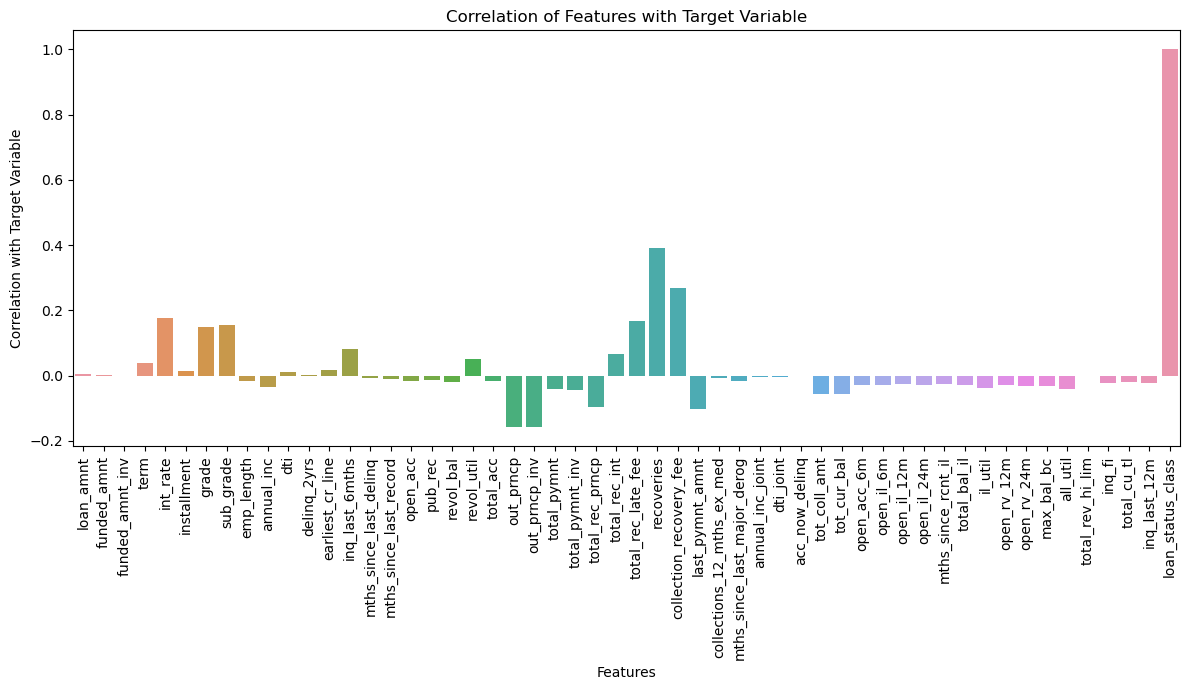

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' with features and a target variable
correlation_matrix = df.corr()

# Correlation with the target variable
correlation_with_target = correlation_matrix['loan_status_class']

# Plotting the correlations
plt.figure(figsize=(12, 7))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation with Target Variable')
plt.title('Correlation of Features with Target Variable')
plt.tight_layout()
plt.show()


#### Identifying features that influence the chances of applicant default

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

In [51]:
X = df.drop(['loan_status_class'],axis=1,inplace=False)
y = df.loan_status_class 

In [52]:
num_cols = [i for i in X.columns if X[i].dtype in ['int','float']]

scaler = StandardScaler()

X[num_cols] = scaler.fit_transform(X[num_cols])

X = pd.get_dummies(X, drop_first=True)
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
0,-1.156460,-1.155635,-1.152256,-0.654724,-0.592611,-1.121467,-0.608261,-0.763889,1.117585,-0.788702,0.552218,-0.364672,-1.708399,0.305877,-0.976339,-0.427385,-1.607673,-0.335522,-0.145932,1.201140,-1.373936,-0.989366,-0.989366,-0.215691,-0.215315,-0.114363,-0.426531,-0.097042,-0.112082,-0.077319,-0.415561,-0.107149,-0.577104,-0.021647,-0.02231,-0.064298,-0.79786,-0.843347,-0.103891,-0.107375,-0.094692,-0.109934,-0.093731,-0.100884,-0.139209,-0.105267,-0.117038,-0.116273,-0.149047,-0.021004,-0.085105,-0.076504,-0.088306,0,0,0,0,1,0,1,0,0,0
1,-1.452829,-1.452198,-1.445430,1.527360,0.461735,-1.543440,0.153586,0.314193,-1.454330,-0.695963,-0.998047,-0.364672,0.174833,4.312132,-0.976339,-0.427385,-1.607673,-0.335522,-0.679268,-1.912396,-1.796220,-0.989366,-0.989366,-0.832158,-0.830023,-0.800135,-0.629790,-0.097042,0.173693,-0.059735,-0.426398,-0.107149,-0.577104,-0.021647,-0.02231,-0.064298,-0.79786,-0.843347,-0.103891,-0.107375,-0.094692,-0.109934,-0.093731,-0.100884,-0.139209,-0.105267,-0.117038,-0.116273,-0.149047,-0.021004,-0.085105,-0.076504,-0.088306,0,0,0,0,1,1,0,0,0,0
2,-1.464683,-1.464061,-1.457275,-0.654724,0.619202,-1.443107,0.153586,0.468204,1.117585,-0.970283,-0.548965,-0.364672,0.443866,1.307441,-0.976339,-0.427385,-1.795740,-0.335522,-0.622684,1.821333,-1.289479,-0.989366,-0.989366,-0.578711,-0.575765,-0.506790,-0.549384,-0.097042,-0.112082,-0.077319,-0.315809,-0.107149,-0.577104,-0.021647,-0.02231,-0.064298,-0.79786,-0.843347,-0.103891,-0.107375,-0.094692,-0.109934,-0.093731,-0.100884,-0.139209,-0.105267,-0.117038,-0.116273,-0.149047,-0.021004,-0.085105,-0.076504,-0.088306,0,0,0,0,1,0,0,0,0,0
3,-0.563724,-0.562507,-0.557025,-0.654724,0.055515,-0.398905,0.153586,-0.147842,1.117585,-0.399200,0.107207,-0.364672,-0.228717,0.305877,1.024235,-0.427385,-0.291201,-0.335522,-0.504878,-1.426299,0.990854,-0.989366,-0.989366,0.592979,0.599678,0.640304,0.216921,4.054312,-0.112082,-0.077319,-0.376798,-0.107149,-0.577104,-0.021647,-0.02231,-0.064298,-0.79786,-0.843347,-0.103891,-0.107375,-0.094692,-0.109934,-0.093731,-0.100884,-0.139209,-0.105267,-0.117038,-0.116273,-0.149047,-0.021004,-0.085105,-0.076504,-0.088306,0,0,0,0,1,1,0,0,0,0
4,-1.393555,-1.392886,-1.386203,1.527360,-0.127055,-1.510842,-0.608261,-0.301854,-1.197139,0.076857,-0.012625,-0.364672,-0.228717,-0.695687,1.024235,-0.427385,0.649136,-0.335522,0.484341,-0.047627,1.075311,-0.899073,-0.899036,-0.548409,-0.545365,-0.531981,-0.355899,-0.097042,-0.112082,-0.077319,-0.437216,-0.107149,-0.577104,-0.021647,-0.02231,-0.064298,-0.79786,-0.843347,-0.103891,-0.107375,-0.094692,-0.109934,-0.093731,-0.100884,-0.139209,-0.105267,-0.117038,-0.116273,-0.149047,-0.021004,-0.085105,-0.076504,-0.088306,0,0,0,0,1,1,0,0,0,0


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#### calculate the mutual information between each feature and the target variable for classification tasks

In [54]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([6.28199102e-03, 6.27696068e-03, 5.77393991e-03, 6.44264323e-02,
       2.72095874e-02, 1.61627686e-02, 2.97824974e-02, 1.56372468e-02,
       2.58861501e-02, 2.27790109e-03, 2.89717820e-04, 3.25484802e-02,
       2.66684778e-03, 3.98410854e-02, 7.00811645e-02, 4.30509008e-02,
       4.27045902e-03, 3.66197699e-02, 8.02747948e-04, 9.85693357e-04,
       2.15195775e-03, 3.75493517e-02, 3.77823589e-02, 1.70827058e-02,
       1.56555994e-02, 4.23576112e-02, 1.19914175e-02, 2.09197343e-02,
       8.87843494e-02, 8.44691558e-02, 3.80238423e-02, 1.12304038e-02,
       6.56499748e-02, 2.43936647e-03, 2.54425524e-03, 1.13012092e-02,
       4.81149204e-03, 4.19849014e-03, 1.25069383e-02, 1.24479399e-02,
       1.19488183e-02, 1.16826938e-02, 1.17027941e-02, 1.22359340e-02,
       2.37506999e-02, 1.21770570e-02, 1.26583413e-02, 1.22173150e-02,
       2.36266780e-02, 2.51507419e-03, 1.17982379e-02, 1.18211600e-02,
       1.24800384e-02, 9.23884676e-02, 0.00000000e+00, 2.28249872e-04,
      

In [55]:
mutual_info0 = pd.DataFrame(mutual_info)
mutual_info0.index = X_train.columns
mutual_info0.sort_values(0,ascending=False)

,0
home_ownership_MORTGAGE,0.092388
recoveries,0.088784
collection_recovery_fee,0.084469
mths_since_last_delinq,0.070081
mths_since_last_major_derog,0.065650
...,...
verification_status_joint_Verified,0.000265
home_ownership_OTHER,0.000228
verification_status_joint_Not Verified,0.000048
home_ownership_NONE,0.000000


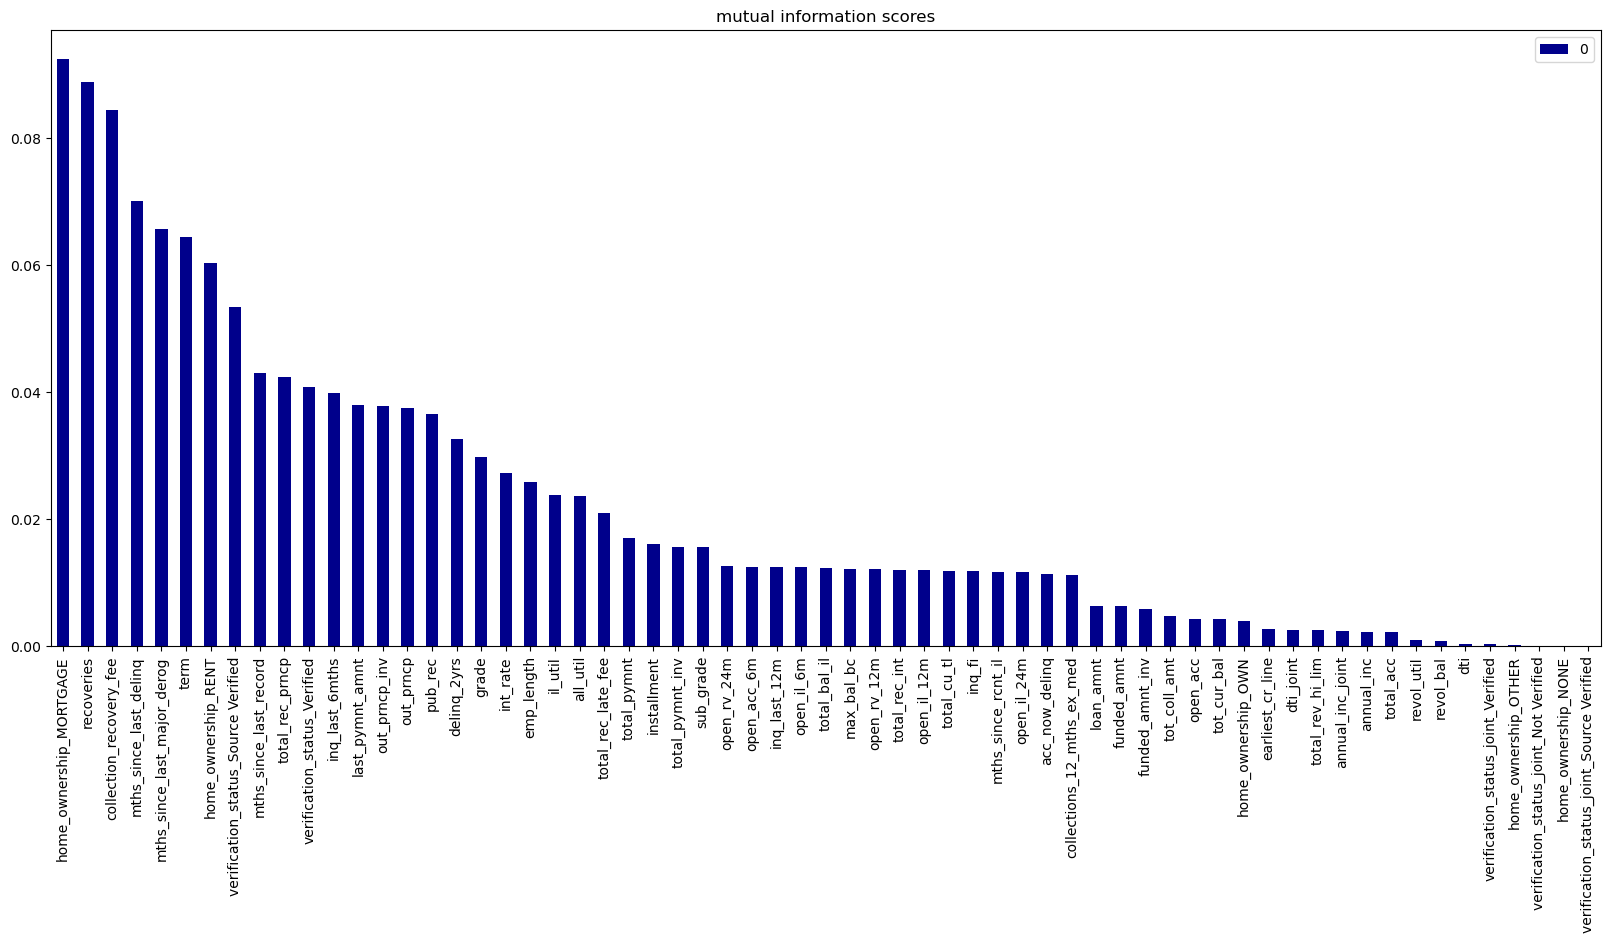

In [56]:
mutual_info0.sort_values(0,ascending=False).plot.bar(figsize=(20, 8),color='#00008B',title='mutual information scores')
plt.show()

##  Logistic Regression Model

In [57]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [58]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [59]:
clf.score(X_train, y_train)

0.9743874843358866

In [60]:
y_pred = clf.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9739773265117537


In [62]:
# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)

Precision: 0.9866539561487131
Recall: 0.6695483415666902
F1-score: 0.797743755036261
AUC-ROC: 0.8343982694745251


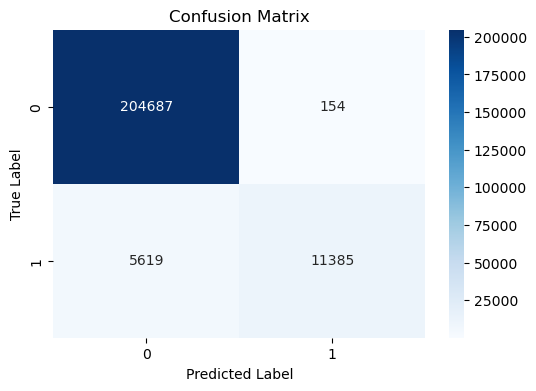

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_true as the true labels and y_pred as the predicted labels
cm = confusion_matrix(y_test, y_pred)

# Define class labels
classes = ['0', '1']

# Display the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


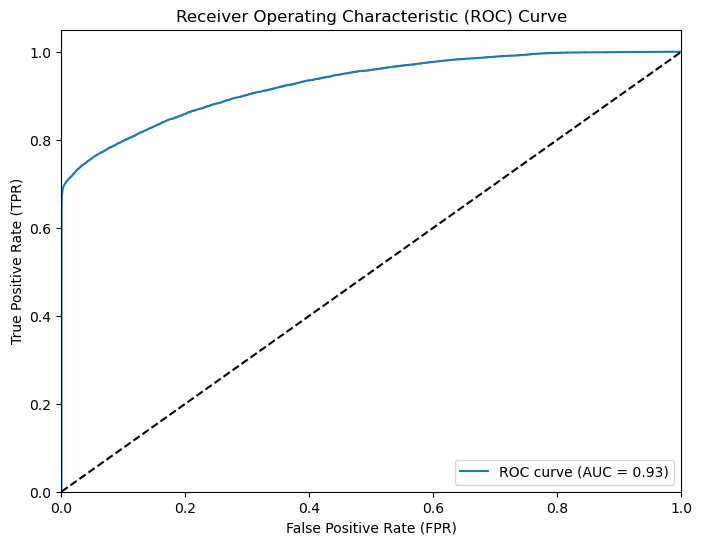

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = clf.predict_proba(X_test)[:, 1]
# Assuming you have y_true as the true labels and y_pred_proba as the predicted probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing the random classifier
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Create a Random Forest Classifier
random_forest = RandomForestClassifier()

# Fit the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred0 = random_forest.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred0)
print("Accuracy:", accuracy)

Accuracy: 0.9748833645112579
